<a href="https://colab.research.google.com/github/YanaAbakumova/Neural_networks/blob/lesson_4/Lesson4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практическое задание

- обучить сверточную нейронную сеть в стиле AlexNet (с падением размера ядра свертки и последовательностью блоков свертка-пулинг  (conv-pool)-(conv-pool)-...) на датасете fashion-mnist или cifar10
- оценить рост точности при увеличении ширины сети (больше ядер)
- оценить рост точности при увеличении глубины сети (больше слоев)
- (опциционально)сравнить с точностью полносвязной сети для этой выборки
    </li>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Dropout, Activation, Flatten, Concatenate, BatchNormalization
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D, AveragePooling2D, GlobalAveragePooling2D 
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
model_name = 'keras_cifar10_trained_model.h5'
num_classes=10
# разделение тренировочной и тестовой выборки
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'тренировочные примеры')
print(x_test.shape[0], 'тестовые примеры')

# преобразование матрицы чисел 0-9 в бинарную матрицу чисел 0-1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

170508288/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 тренировочные примеры
10000 тестовые примеры


In [ ]:
def create_model(n_layers, n_epochs, kernel_size, n_kernels, bs, data_augmentation=True):

  # конфигурирование слоев нейросети
  model = Sequential()

  # слои нейросети отвественные за свертку и max-pooling
  model.add(Conv2D(n_kernels, (kernel_size, kernel_size), padding='same',
                 input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(n_kernels, (kernel_size, kernel_size), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout( 0.25))

  for n in range(2, n_layers+1):
    model.add(Conv2D(n_kernels*n, (kernel_size, kernel_size), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(n_kernels*n, (kernel_size, kernel_size), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout( 0.25))

  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
  
  if not data_augmentation:
    print('Не используется data augmentation')
    hh = model.fit(x_train, y_train,
              batch_size=bs,
              epochs=n_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False, 
        zca_epsilon=1e-06, 
        rotation_range=15, 
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0., 
        zoom_range=0., 
        channel_shift_range=0.,
        fill_mode='nearest',
        cval=0.,
        horizontal_flip=True,
        vertical_flip=False,
        rescale=None,
        preprocessing_function=None,
        data_format=None,
        validation_split=0.0)

    hh = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=bs),
                        epochs=n_epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
  return hh.history

In [ ]:
# больше ядер
info_kernels = {}
n_kernels = [16, 32, 64, 128]
epochs = 15
for n in n_kernels:
  info_kernels[n] = create_model(n_layers = 3, n_epochs=epochs, kernel_size= 3, n_kernels=n, bs = 1000, data_augmentation=False)




Не используется data augmentation
Epoch 1/15
50/50 [==============================] - 8s 110ms/step - loss: 2.1812 - accuracy: 0.1974 - val_loss: 1.9855 - val_accuracy: 0.2809
Epoch 2/15
50/50 [==============================] - 5s 103ms/step - loss: 1.9723 - accuracy: 0.2901 - val_loss: 1.7350 - val_accuracy: 0.3812
Epoch 3/15
50/50 [==============================] - 5s 104ms/step - loss: 1.8489 - accuracy: 0.3318 - val_loss: 1.7124 - val_accuracy: 0.3737
Epoch 4/15
50/50 [==============================] - 5s 103ms/step - loss: 1.7400 - accuracy: 0.3676 - val_loss: 1.7777 - val_accuracy: 0.3562
Epoch 5/15
50/50 [==============================] - 5s 103ms/step - loss: 1.6710 - accuracy: 0.3952 - val_loss: 1.5267 - val_accuracy: 0.4442
Epoch 6/15
50/50 [==============================] - 5s 103ms/step - loss: 1.5923 - accuracy: 0.4231 - val_loss: 1.4251 - val_accuracy: 0.4956
Epoch 7/15
50/50 [==============================] - 5s 104ms/step - loss: 1.5379 - accuracy: 0.4432 - val_loss: 1.

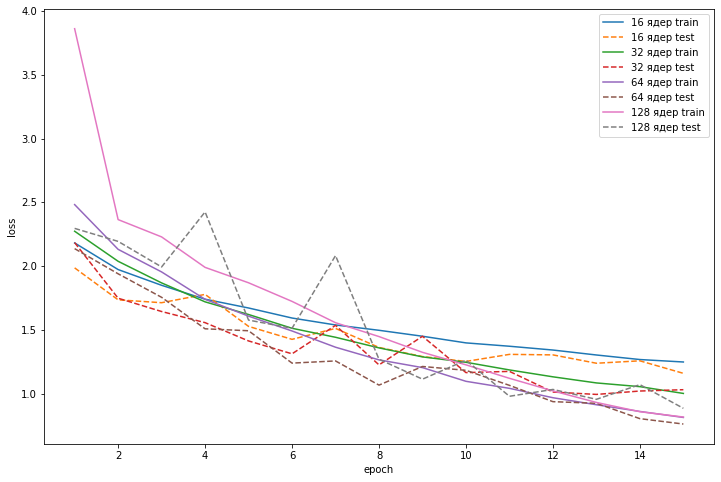

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_kernels.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_kernels[key]['loss'], '-', label=f'{key} ядер train')
  plt.plot(np.linspace(1, epochs, epochs), info_kernels[key]['val_loss'], '--', label=f'{key} ядер test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

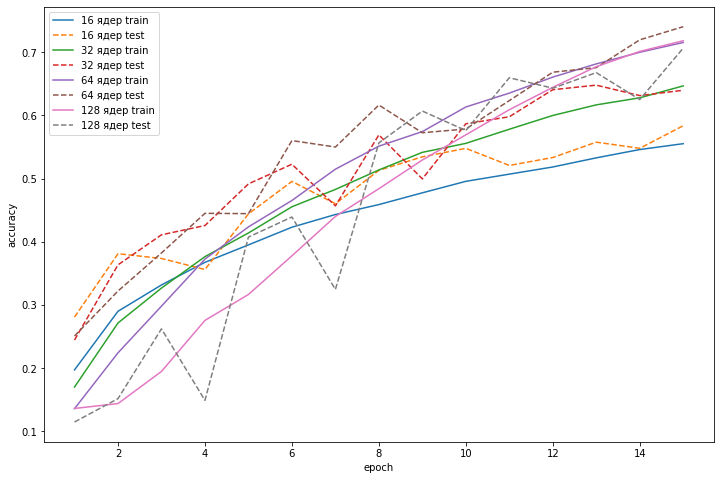

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_kernels.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_kernels[key]['accuracy'], '-', label=f'{key} ядер train')
  plt.plot(np.linspace(1, epochs, epochs), info_kernels[key]['val_accuracy'], '--', label=f'{key} ядер test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

In [ ]:
# больше слоев
info_layers = {}
n_layers = [2, 3, 4]
epochs = 15
for n in n_layers:
  info_layers[n] = create_model(n_layers = n, n_epochs=epochs, kernel_size= 3, n_kernels=128, bs = 1000, data_augmentation=False)

Не используется data augmentation
Epoch 1/15
50/50 [==============================] - 25s 457ms/step - loss: 2.2893 - accuracy: 0.1698 - val_loss: 1.9798 - val_accuracy: 0.2919
Epoch 2/15
50/50 [==============================] - 23s 451ms/step - loss: 1.9455 - accuracy: 0.3081 - val_loss: 1.6448 - val_accuracy: 0.4175
Epoch 3/15
50/50 [==============================] - 22s 447ms/step - loss: 1.7154 - accuracy: 0.3892 - val_loss: 1.5140 - val_accuracy: 0.4490
Epoch 4/15
50/50 [==============================] - 22s 448ms/step - loss: 1.5866 - accuracy: 0.4413 - val_loss: 1.3149 - val_accuracy: 0.5344
Epoch 5/15
50/50 [==============================] - 23s 454ms/step - loss: 1.4380 - accuracy: 0.4933 - val_loss: 1.2977 - val_accuracy: 0.5417
Epoch 6/15
50/50 [==============================] - 23s 452ms/step - loss: 1.3124 - accuracy: 0.5405 - val_loss: 1.1575 - val_accuracy: 0.5920
Epoch 7/15
50/50 [==============================] - 22s 449ms/step - loss: 1.2218 - accuracy: 0.5718 - val_l

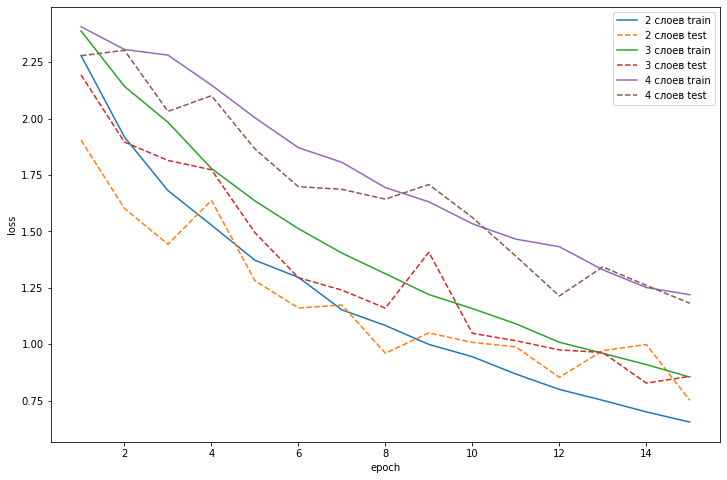

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_layers.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['loss'], '-', label=f'{key} слоев train')
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['val_loss'], '--', label=f'{key} слоев test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

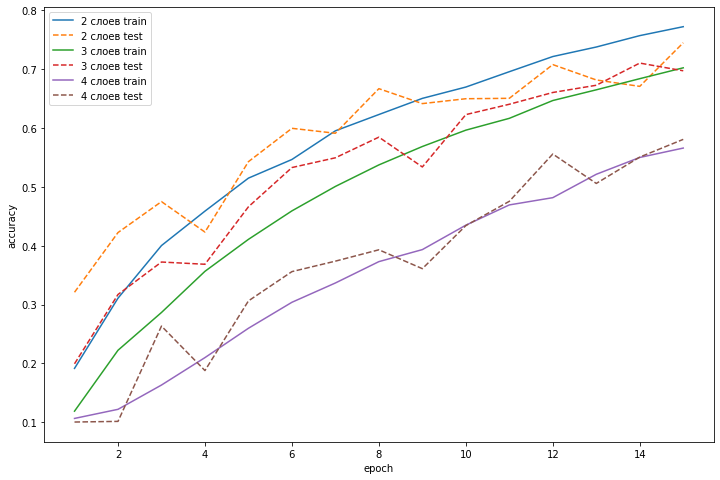

In [ ]:
plt.figure(figsize=(12, 8))
for key in info_layers.keys():
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['accuracy'], '-', label=f'{key} слоев train')
  plt.plot(np.linspace(1, epochs, epochs), info_layers[key]['val_accuracy'], '--', label=f'{key} слоев test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.show()

При нескольких перезапусков результаты разные, сложно сделать однозначный вывод. Видно, что модель недообученная и нестабильная (точность растет скачками, с "провалами"). Для повышения стабильности и уменьшения переобучения попробуем добавить batch_normalization и увеличивать dropout вместе с увеличением кол-ва слоев

In [4]:
def create_model(n_layers, n_epochs, kernel_size, n_kernels, bs, data_augmentation=True):

  # конфигурирование слоев нейросети
  model = Sequential()

    # слои нейросети отвественные за свертку и max-pooling
  model.add(Conv2D(n_kernels, (kernel_size, kernel_size), padding='same',
                 input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Conv2D(n_kernels, (kernel_size, kernel_size), padding='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.2))

  for n in range(2, n_layers+1):
    model.add(Conv2D(n_kernels*n, (kernel_size, kernel_size), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(n_kernels*n, (kernel_size, kernel_size), padding='same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout((n+1)/10))

  
  # полносвязные слои нейронной сети
  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])
  
  if not data_augmentation:
    print('Не используется data augmentation')
    hh = model.fit(x_train, y_train,
              batch_size=bs,
              epochs=n_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

    hh = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=bs),
                        epochs=n_epochs,
                        validation_data=(x_test, y_test),
                        workers=4)
    
  return hh.history


In [ ]:
# больше эпох
info_epochs= create_model(n_layers = 3, n_epochs=100, kernel_size= 3, n_kernels=64, bs = 1000, data_augmentation=False)

Не используется data augmentation
Epoch 1/100
50/50 [==============================] - 55s 407ms/step - loss: 2.1413 - accuracy: 0.3759 - val_loss: 3.4445 - val_accuracy: 0.1000
Epoch 2/100
50/50 [==============================] - 20s 407ms/step - loss: 1.3222 - accuracy: 0.5519 - val_loss: 3.6409 - val_accuracy: 0.1001
Epoch 3/100
50/50 [==============================] - 20s 404ms/step - loss: 1.0139 - accuracy: 0.6487 - val_loss: 3.3810 - val_accuracy: 0.1033
Epoch 4/100
50/50 [==============================] - 20s 409ms/step - loss: 0.8288 - accuracy: 0.7079 - val_loss: 3.3533 - val_accuracy: 0.1066
Epoch 5/100
50/50 [==============================] - 20s 409ms/step - loss: 0.7098 - accuracy: 0.7500 - val_loss: 5.4137 - val_accuracy: 0.1000
Epoch 6/100
50/50 [==============================] - 20s 408ms/step - loss: 0.6286 - accuracy: 0.7808 - val_loss: 3.4355 - val_accuracy: 0.1402
Epoch 7/100
50/50 [==============================] - 20s 409ms/step - loss: 0.5541 - accuracy: 0.8062 

Text(0, 0.5, 'accuracy')

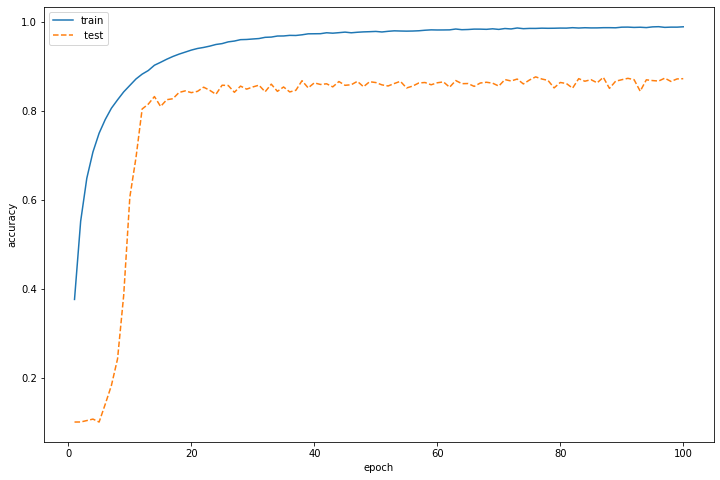

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, 100, 100), info_epochs['accuracy'], '-', label=f'train')
plt.plot(np.linspace(1, 100, 100), info_epochs['val_accuracy'], '--', label=f' test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
info_epochs= create_model(n_layers = 4, n_epochs=100, kernel_size= 3, n_kernels=64, bs = 1000, data_augmentation=False)

Не используется data augmentation
Epoch 1/100
50/50 [==============================] - 60s 470ms/step - loss: 2.3253 - accuracy: 0.3003 - val_loss: 2.7595 - val_accuracy: 0.1004
Epoch 2/100
50/50 [==============================] - 23s 463ms/step - loss: 1.5677 - accuracy: 0.4574 - val_loss: 2.8482 - val_accuracy: 0.1165
Epoch 3/100
50/50 [==============================] - 23s 463ms/step - loss: 1.2028 - accuracy: 0.5790 - val_loss: 3.0090 - val_accuracy: 0.1034
Epoch 4/100
50/50 [==============================] - 23s 461ms/step - loss: 0.9735 - accuracy: 0.6638 - val_loss: 3.1966 - val_accuracy: 0.1070
Epoch 5/100
50/50 [==============================] - 23s 463ms/step - loss: 0.8098 - accuracy: 0.7198 - val_loss: 3.5812 - val_accuracy: 0.1008
Epoch 6/100
50/50 [==============================] - 23s 461ms/step - loss: 0.7085 - accuracy: 0.7557 - val_loss: 3.4858 - val_accuracy: 0.1037
Epoch 7/100
50/50 [==============================] - 23s 460ms/step - loss: 0.6197 - accuracy: 0.7863 

Text(0, 0.5, 'accuracy')

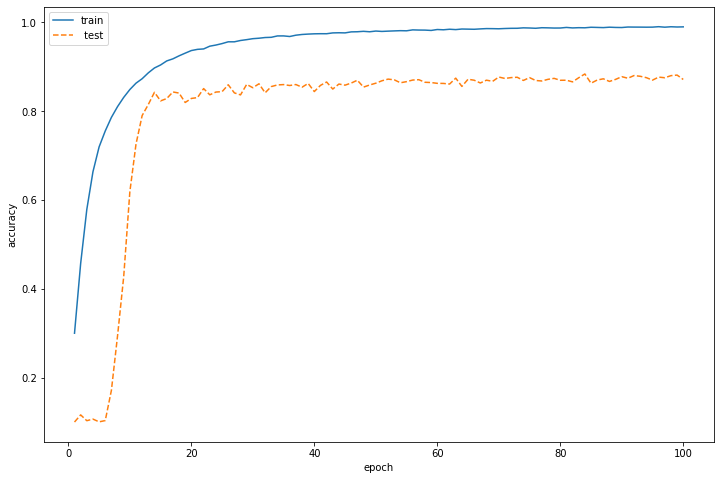

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, 100, 100), info_epochs['accuracy'], '-', label=f'train')
plt.plot(np.linspace(1, 100, 100), info_epochs['val_accuracy'], '--', label=f' test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

In [ ]:
info_epochs= create_model(n_layers = 4, n_epochs=100, kernel_size= 3, n_kernels=128, bs = 1000, data_augmentation=False)

Не используется data augmentation
Epoch 1/100
50/50 [==============================] - 82s 1s/step - loss: 2.4083 - accuracy: 0.2815 - val_loss: 4.4145 - val_accuracy: 0.1003
Epoch 2/100
50/50 [==============================] - 56s 1s/step - loss: 1.6557 - accuracy: 0.4364 - val_loss: 5.0978 - val_accuracy: 0.1003
Epoch 3/100
50/50 [==============================] - 56s 1s/step - loss: 1.2147 - accuracy: 0.5823 - val_loss: 3.3168 - val_accuracy: 0.1036
Epoch 4/100
50/50 [==============================] - 56s 1s/step - loss: 0.9070 - accuracy: 0.6873 - val_loss: 3.7884 - val_accuracy: 0.1001
Epoch 5/100
50/50 [==============================] - 56s 1s/step - loss: 0.7081 - accuracy: 0.7564 - val_loss: 4.6478 - val_accuracy: 0.1001
Epoch 6/100
50/50 [==============================] - 56s 1s/step - loss: 0.5679 - accuracy: 0.8047 - val_loss: 3.0469 - val_accuracy: 0.1587
Epoch 7/100
50/50 [==============================] - 56s 1s/step - loss: 0.4613 - accuracy: 0.8401 - val_loss: 3.2322 - 

Text(0, 0.5, 'accuracy')

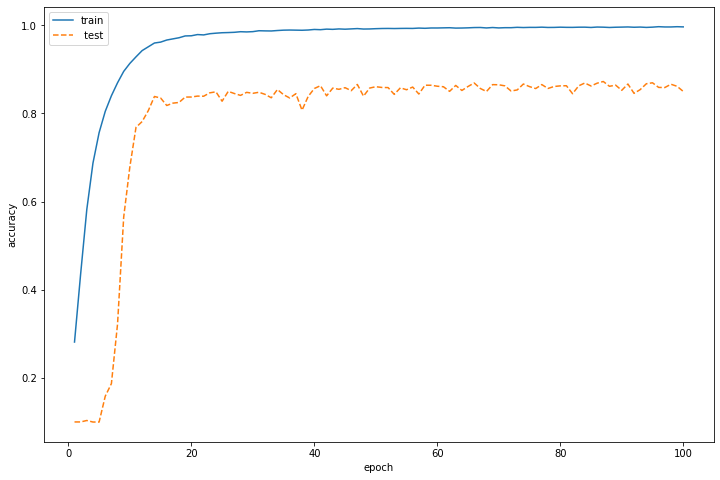

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, 100, 100), info_epochs['accuracy'], '-', label=f'train')
plt.plot(np.linspace(1, 100, 100), info_epochs['val_accuracy'], '--', label=f' test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Лучшие результаты в предыдущих запусках достигнуты на 84-87х эпохах. Лучший результат по accuracy (0.884) получился у модели с 4 слоями и кол-вом ядер 64

In [5]:
#data augmentation 
info_epochs= create_model(n_layers = 4, n_epochs=90, kernel_size= 3, n_kernels=64, bs = 1000, data_augmentation=True)

Использование data augmentation в реальном времени


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/90
50/50 [==============================] - 83s 844ms/step - loss: 2.3192 - accuracy: 0.2789 - val_loss: 2.8223 - val_accuracy: 0.0999
Epoch 2/90
50/50 [==============================] - 50s 925ms/step - loss: 1.6778 - accuracy: 0.4203 - val_loss: 3.6463 - val_accuracy: 0.1005
Epoch 3/90
50/50 [==============================] - 50s 922ms/step - loss: 1.3735 - accuracy: 0.5228 - val_loss: 2.8199 - val_accuracy: 0.1015
Epoch 4/90
50/50 [==============================] - 50s 926ms/step - loss: 1.1865 - accuracy: 0.5945 - val_loss: 3.0220 - val_accuracy: 0.1051
Epoch 5/90
50/50 [==============================] - 50s 919ms/step - loss: 1.0107 - accuracy: 0.6541 - val_loss: 3.7756 - val_accuracy: 0.1073
Epoch 6/90
50/50 [==============================] - 49s 925ms/step - loss: 0.8901 - accuracy: 0.6939 - val_loss: 3.4160 - val_accuracy: 0.1032
Epoch 7/90
50/50 [==============================] - 49s 927ms/step - loss: 0.7887 - accuracy: 0.7256 - val_loss: 3.4428 - val_accuracy: 0.1380

Text(0, 0.5, 'accuracy')

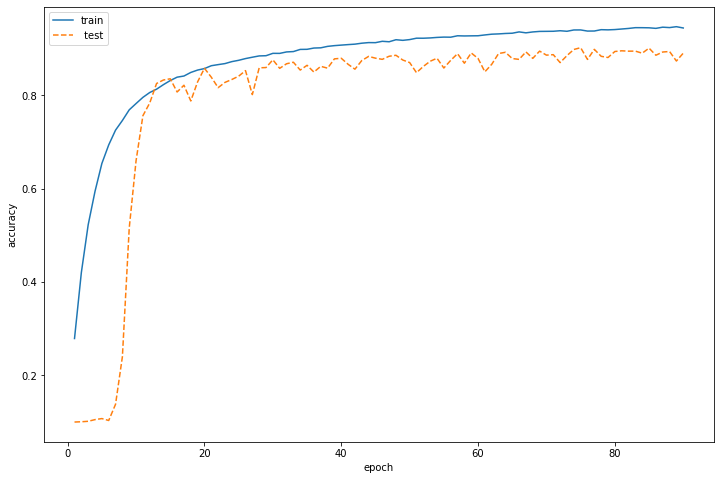

In [6]:
plt.figure(figsize=(12, 8))
plt.plot(np.linspace(1, 90, 90), info_epochs['accuracy'], '-', label=f'train')
plt.plot(np.linspace(1, 90, 90), info_epochs['val_accuracy'], '--', label=f' test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')

Аугментация помогла улучшить результат до 0.9023 на 75й эпохе.

Попробуем сделать полносвязную модель:

In [5]:
def create_model(n_layers, n_neurons, n_epochs, bs, data_augmentation = False):

  inputs = Input(shape=(x_train.shape[1:]), name='digits') 
  x=Flatten()(inputs)
  for i in range(n_layers-1):
      x = Dense(n_neurons,activation = 'relu', name='dense_'+str(i) )(x)
      x = BatchNormalization()(x)
      x = Dropout((i+1)/10)(x)
  outputs = Dense(10,name='predictions', activation='softmax')(x) 

  model = Model(inputs=inputs, outputs=outputs) 

  model.compile(optimizer= 'RMSProp' ,loss='categorical_crossentropy',metrics=['accuracy'])

  if not data_augmentation:
    print('Не используется data augmentation')
    hh = model.fit(x_train, y_train,
              batch_size=bs,
              epochs=n_epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
  else:
    print('Использование data augmentation в реальном времени')
    # Препроцессинг и data augmentation в реальном времени:
    datagen = ImageDataGenerator(rotation_range=15,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            vertical_flip=False)

    hh = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=bs),
                        epochs=n_epochs,
                        validation_data=(x_test, y_test),
                        workers=4)

  return hh.history

In [6]:
info= create_model(n_layers = 4, n_neurons = 512, n_epochs=90, bs = 1000, data_augmentation=True)

Использование data augmentation в реальном времени


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/90
50/50 [==============================] - 41s 744ms/step - loss: 2.3028 - accuracy: 0.2805 - val_loss: 4.3027 - val_accuracy: 0.1186
Epoch 2/90
50/50 [==============================] - 39s 723ms/step - loss: 1.9307 - accuracy: 0.3447 - val_loss: 2.3733 - val_accuracy: 0.2594
Epoch 3/90
50/50 [==============================] - 38s 718ms/step - loss: 1.8057 - accuracy: 0.3710 - val_loss: 1.8691 - val_accuracy: 0.3209
Epoch 4/90
50/50 [==============================] - 38s 721ms/step - loss: 1.7295 - accuracy: 0.3922 - val_loss: 2.1495 - val_accuracy: 0.2709
Epoch 5/90
50/50 [==============================] - 38s 726ms/step - loss: 1.6645 - accuracy: 0.4099 - val_loss: 1.9333 - val_accuracy: 0.3059
Epoch 6/90
50/50 [==============================] - 38s 726ms/step - loss: 1.6042 - accuracy: 0.4281 - val_loss: 1.7950 - val_accuracy: 0.3541
Epoch 7/90
50/50 [==============================] - 39s 729ms/step - loss: 1.5719 - accuracy: 0.4386 - val_loss: 2.0066 - val_accuracy: 0.3031

Лучший результат 0.9023 показала модель в стиле AlexNet с аугментацией и параметрами:

- 4 слоя
- 75 эпох
- 64 ядра
- оптимизатор: RMSProp